In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [33]:

X = np.atleast_2d(np.linspace(0, 10, 20)).T
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

In [34]:

length_scale = 1.0
kernel = C(1.0) * RBF(length_scale=length_scale)

In [35]:

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=0.1**2)


gp.fit(X, y)

GaussianProcessRegressor(alpha=0.010000000000000002,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=5)

In [36]:

X_pred = np.atleast_2d(np.linspace(0, 10, 100)).T


y_pred, sigma = gp.predict(X_pred, return_std=True)

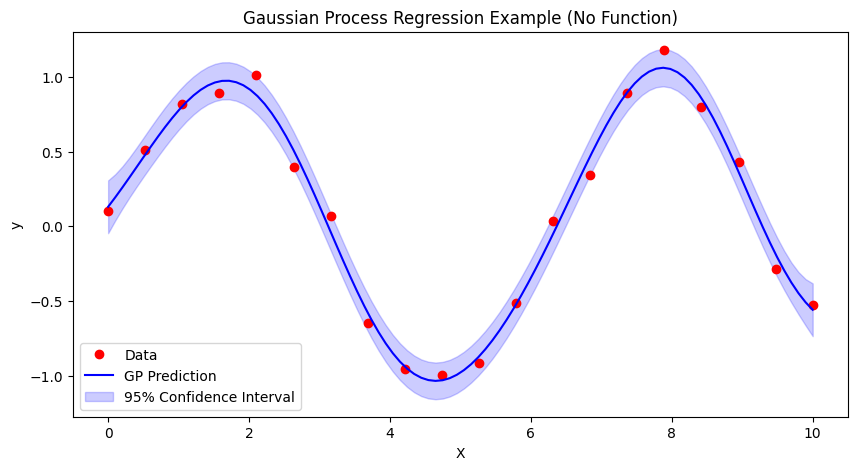

In [37]:
plt.figure(figsize=(10,5))
plt.plot(X, y, 'ro', label='Data')
plt.plot(X_pred, y_pred, 'b-', label='GP Prediction')
plt.fill_between(X_pred.ravel(),
                 y_pred - 1.96*sigma,
                 y_pred + 1.96*sigma,
                 alpha=0.2, color='blue', label='95% Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression Example (No Function)')
plt.legend()
plt.show()